# Assignment No : 2
Name   : Paliwal Mohan Subhash

Reg No : P2DSC21019

Date : 15/01/2022

In [4]:
import random
import math
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns
%matplotlib inline



## 1. SAMPLING THEOREM

#### 1) Rick takes an SRS of 75 citizens on a distant planet to see what proportion of citizens sampled are satisfied with their standard of living. Suppose that 60% of the 1,000,000,000 citizens who live on the planet are satisfied with their living standards. What are the mean and standard deviation of the sampling distribution of the proportion of citizens who are satisfied with their standard of living?

In [ ]:
n=75 # B(n,p)
hat_p = 0.6
print(hat_p)
#sd(P)=sqrt((pq/n))
sigma_p_hat = np.sqrt(0.6*(1-0.6)/75)
print(sigma_p_hat)

0.6
0.0565685424949238


(array([  5.,  26., 107., 241., 513., 567., 357., 145.,  35.,   4.]),
 array([30. , 32.9, 35.8, 38.7, 41.6, 44.5, 47.4, 50.3, 53.2, 56.1, 59. ]),
 <BarContainer object of 10 artists>)

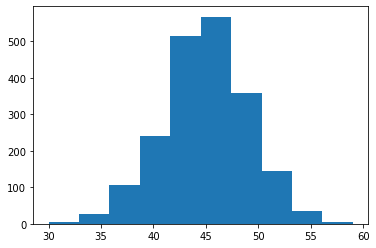

In [ ]:
p=0.6
n=75
x=bernoulli(p)
y=[x.rvs(n) for i in range(2000)]
plt.hist(np.sum(y,axis=1))

In [ ]:
print("emparically calculated mean :", np.mean(np.mean(y,axis=1)))
print("Theoritical calculated mean :",p," \n")
print("emparically calculated standard deviation :", np.std(np.mean(y,axis=1)))
print("Theoritical calculated standard deviatio :",np.sqrt(p*(1-p)/n)," \n")


emparically calculated mean : 0.6000066666666667
Theoritical calculated mean : 0.6  

emparically calculated standard deviation : 0.056416703200382064
Theoritical calculated standard deviatio : 0.0565685424949238  



#### 2) Rick is performing quality control tests on different portal guns since there is some variability in the manufacturing process. For example, a certain gun has a target thickness of 5mm. The distribution of thicknesses is skewed to the right with a mean of 5mm and a standard deviation of 1mm. A quality control check on this part involves taking a random sample of 35 points and calculating the mean thickness of those points. What is the shape of the sampling distribution of the sample mean thickness? What is the probability that the mean thickness in the sample is within 0.2mm of the target value?


In [ ]:
mu=5
sd=1
n=35
# Since n = 35 >= 30, the central limit theorem applies.
# Even though the population is skewed to the right,
#the sample meansare normally distributed due to the sample size.
print(" shape of the sampling distribution of the sample mean thickness is ::: Normal")

prob=norm.cdf(5.2, mu,sd/n**(1/2)) - norm.cdf(4.8, mu, sd/n**(1/2))
print(" probability that the mean thickness in the sample is within 0.2mm of the target value is :",prob)

 shape of the sampling distribution of the sample mean thickness is ::: Normal
 probability that the mean thickness in the sample is within 0.2mm of the target value is : 0.763276429362143


## 2. INTERVAL ESTIMATION

#### 1) In a sample of 659 parents with toddlers, about 85%, stated they use a car seat for all travel with their toddler. From these results, a 95% confidence interval was provided, going from about 82.3% up to 87.7%. Identify the parameters and plot the graph.

In [ ]:
0.85-norm.ppf(0.025)*np.sqrt(0.85*0.15/n)

0.8772621734203857

population parameter :  0.85


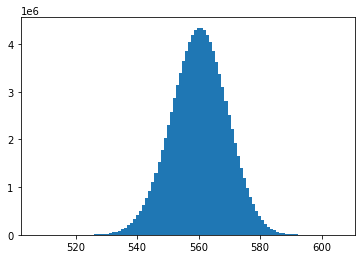

In [ ]:
n=659
p=0.85
c=0.95
a=0.05
L=0.823
U=0.877

# Parameter is Population Proportion (P) is Unbiased estimator of sample Proportion i.e  P=E(p_hat)
# here p_vat=0.85
print("population parameter : ",p )
np.random.seed(10)
from scipy.stats import binom
population_ages= binom.rvs(n=659,p=0.85,size=100000000)
plt.hist(population_ages , bins=100);

In [ ]:
np.random.seed(10)

sample_size = 659

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()/659
    sample_means.append(sample_mean)
    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         
    pop_stdev = np.sqrt(sample_mean*(1-sample_mean)/659) # Get the population standard deviation
    margin_of_error = z_critical * (pop_stdev)
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

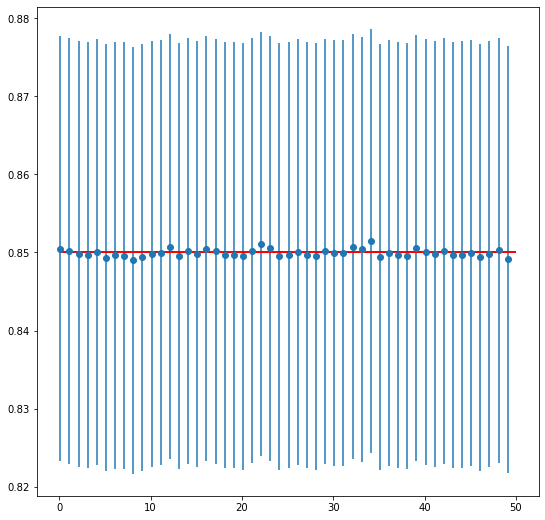

In [ ]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 50, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0,xmax=50,
           y=0.85,
           linewidth=2.0,
           color="red");

#### 2) Download the dataset from heart disease. import it using the command
                data = pd.read_csv(heart.csv)
Assume CI = 95% and calculate via plotting:
#### a. Is the population proportion of females with heart disease the same as the population proportion of males with heart disease?

#### b. The dataset has a ‘chol’ column that contains the cholesterol level. Calculate the confidence interval of the mean cholesterol level of the female population.

In [ ]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Mohan\\Desktop\\heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
C=0.95
a=0.05
# sex 1 means male ,0 means female
# target 1 means HD present, 

n1=data[data["sex"]==1]["sex"].count()
n2=data[data["sex"]==0]["sex"].count()
x1=data[(data["sex"]==1) & (data["target"]==1)]["target"].count()
x2=data[(data["sex"]==0) & (data["target"]==1)]["target"].count()
p1=x1/n1
p2=x2/n2
print(" P1 (PP of Male HD): ",p1)
print(" P2 (PP of female HD): ",p2)
# Z=(p1-p2)/np.sqrt(((p1*(1-p1)/n1)+(p2*(1-p2)/n2))
Z=(p1-p2)/np.sqrt(((p1*(1-p1)/n1))+(p2*(1-p2)/n2))
print(Z)
print("Population Prop of famale HD and population prop of Male HD are not same")

 P1 (PP of Male HD):  0.4492753623188406
 P2 (PP of female HD):  0.75
-5.359476411296547
Population Prop of famale HD and population prop of Male HD are not same


In [ ]:
# b]----
mu=data["chol"].mean()
sd=data["chol"].std()
n=data["chol"].count()
Zab2=stats.norm.ppf(q = 0.975)
#CI (mu +- Z_a/2*sd/n)
L=mu-Zab2*sd/np.sqrt(n)
U=mu+Zab2*sd/np.sqrt(n)
print(" Confidence Int of Chol is (",L,",",U,")")

 Confidence Int of Chol is ( 240.42803990733134 , 252.1000128979492 )


## 3. SIGNIFICANCE LEVELS TESTING

#### 1) According to a large poll from last year, about 85% of houses in Porto have access tohigh-speed internet. Marco wondered if the proportion had changed and took a random sample of 80 houses and found that 75 had access to high-speed internet. He wants to use this sample data to test if the proportion actually changed. Assuming that the conditions for inference were met, what would you conclude about the proportion of houses with high-speed internet considering a significance level of 1%?


In [ ]:
# H0 : P0=0.85 vs  H1  : P0 not= 0.85
n=80
x=75
phat=75/80

Z=(phat-0.85)/np.sqrt((0.85*0.15/80))
Z

2.191785018798024

In [ ]:
pvalue=(1-norm.cdf(Z))+norm.cdf(-Z)
pvalue
# pvalue > alpha=0.01
# FAIL TO REJECT H0 
print(" there is not enough evidence at to reject the claim \
that 85% of houses in Porto have access tohigh-speed internet")
# if we take alpha is 0.10  then alpha/2 =0.05
# then Pvalue < alpha/2
# at 10% LOS we can say that there is enough evidence to reject the claim

 there is not enough evidence at to reject the claim that 85% of houses in Porto have access tohigh-speed internet


#### 2) Marta owns a fruit store and receives watermelons weekly. The supplier states that they are supposed to weigh 1kg. Marta decides to weigh a random sample of 100 watermelons and finds a mean weight of 850g and a standard deviation of 200g. She wants to use this sample data to test if the mean is smaller than the one claimed by the supplier and renegotiate their contract if this is the case. Assuming that the conditions for inference were met, what should Marta do (consider a significance level of 5%)?

In [ ]:
mu=1000
n=100
xbar=850
sd=200
# H0 mu>=1000 (claim) vs  H1 mu < 1000
Z=(xbar-mu)/(sd/np.sqrt(n))
Z

-7.5

In [ ]:
pvalue=norm.cdf(Z)
print("P value Is : ",pvalue , "   <   ", "alpha=0.05")
alpha=0.05
# here Pvalue < alpha
# there is enough evidence to reject the claim at 5% LOS that watermelons weigh is 1kg.
# [accept H1] mean weight is smaller than the one claimed by the supplier.
# marta should renegotiate their contract.


P value Is :  3.1908916729108844e-14    <    alpha=0.05


## 4. HYPOTHESIS TESTING


### 1. One sample t-test

Data:
Systolic blood pressures of 14 patients are given below:

183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138

Test, whether the population mean, is less than 165

In [ ]:
n=14
x=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]
xbar=np.mean(x)
sd=np.std(x)
mu=165
# H0 : mu=165     vs     H1 :  mu < 165 
tcal= (xbar-mu)/(sd/np.sqrt(n-1)) 
tcal

-1.243182877661369

In [ ]:
stats.ttest_1samp(a = x,popmean = 165, alternative= "less") 

Ttest_1sampResult(statistic=-1.243182877661369, pvalue=0.11787740505906531)

In [ ]:
stats.t.cdf(x= -1.243182877661369,     # p Value
               df= 13)

0.11787740505906531

In [ ]:
# Pvalue is > alpha (0.05)
# fail to reject  H0
print(" there is not enough evidence to support the claim that mean  Systolic blood pressures is less than 165.  ")

 there is not enough evidence to support the claim that mean  Systolic blood pressures is less than 165.  


### 2. Two sample t-test

Data:
Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy, an
experiment was conducted. The results are given below:
Ammonium

chloride(X1)   13.4   10.9   11.2   11.8   14    15.3   14.2   12.6   17     16.2   16.5   15.7

Urea    (X2)    12    11.7   10.7   11.2   14.8  14.4   13.9   13.7   16.9   16     15.6   16


In [ ]:
# # H0 : mu1=mu2 vs    H1 :  mu1 not= mu2

x1=[13.4, 10.9, 11.2, 11.8, 14 ,15.3, 14.2 ,12.6 ,17 ,16.2 ,16.5 ,15.7] 
x2=[12, 11.7 ,10.7, 11.2 ,14.8, 14.4 ,13.9 ,13.7 ,16.9 ,16 ,15.6 ,16]
xbar1=np.mean(x1)
xbar2=np.mean(x2)
sd1=np.std(x1)
sd2=np.std(x2)
#poosd=np.sqrt((((len(x1)-1)*sd1**2)+(len(x2)-1)*sd2**2)/(len(x1)+len(x2)-2))
#sd_xbar=poosd*np.sqrt((1/len(x1))+(1/len(x2)))

sdd=np.sqrt(((sd1**2/(len(x1)-1))+(sd2**2/(len(x2)-1)))) # sd of diff of means

tcal2=(xbar1-xbar2)/sdd
tcal2

0.1846496543760765

In [ ]:
stats.ttest_ind(x1,x2, alternative='two-sided')

Ttest_indResult(statistic=0.1846496543760765, pvalue=0.8551954147800473)

In [ ]:
# pvalue   >   alpha 0.05
#  Fail to reject null H0
# there is not enough evidence to reject  the H0 that effectiveness of ammonium chloride and urea, on the grain yield of paddy is same
print(" the effectiveness of ammonium chloride and urea, on the grain yield of paddy is same")

 the effectiveness of ammonium chloride and urea, on the grain yield of paddy is same


### 3. paired t-test

Data:Eleven schoolboys were given a test in Statistics. They were given a Month’s tuition and a
second test were held at the end of it. Do the marks give evidence that the students have
benefited from the exam coaching?

Marks in 1st test: 23 20 19 21 18 20 18 17 23 16 19

Marks in 2nd test: 24 19 22 18 20 22 20 20 23 20 18


In [ ]:
# # H0 : mu1=mu2 vs    H1 :  mu1 < mu2 (claim)

x1=[23, 20 ,19 ,21, 18, 20 ,18, 17, 23, 16 ,19]
x2=[24, 19, 22, 18 ,20, 22, 20, 20, 23, 20 ,18]

# alpha =0.05

In [ ]:
stats.ttest_rel(x1,x2, alternative='less')

Ttest_relResult(statistic=-1.7073311796734163, pvalue=0.05928233823800569)

In [ ]:
# pvalue  >   alpha=0.05
# fail to reject H0
print(" conclusion : there is not enough evidence to support the claim that \
students have benefited from the exam coaching")

 conclusion : there is not enough evidence to support the claim that students have benefited from the exam coaching


### 4. One-sample z-test

A school claimed that the students’ study that is more intelligent than the average school.
On calculating the IQ scores of 50 students, the average turns out to be 11. The mean of
the population IQ is 100 and the standard deviation is 15. State whether the claim of
principal is right or not at a 5% significance level.

In [ ]:
# H0 : mu=100 vs    H1 :  mu > 100 (claim)
n=50
xbar = 110
sd=15
sd_xbar = 15/math.sqrt(50)
alpha =0.05
mu =100
  
Z=(xbar-mu)/sd_xbar
P_value=1-norm.cdf(Z)
print('Z statistics is ', Z  ," and P value  is  : ", P_value)  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Z statistics is  4.714045207910317  and P value  is  :  1.2142337364462463e-06
Reject Null Hypothesis


In [ ]:
print(" Conclusion : there is enough evidence to support the principle's  claim that \
the students’ study that is more intelligent than the average school")

 Conclusion : there is enough evidence to support the principle's  claim that the students’ study that is more intelligent than the average school


### 5. Two sample z-test


Suppose the IQ levels among individuals in two different cities are known to be normally
distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are
different, so she selects a simple random sample of 20 individuals from each city and records
their IQ levels. Use the below data given for estimation.

cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

In [ ]:
A= [82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114]
B= [90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133]
# sd is known means here we use Z test 
# # H0 : mu1 = mu2   vs    H1 :  mu1 (not=) mu2 (claim)
n1=n2=20


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
Zcal, pvalue=ztest(A,B)
print(" Z Cal value is : ",Zcal," P value is : " ,pvalue,"\n")
# The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.
print( "Since this p-value is less than .05,\
we have sufficient evidence to reject the null hypothesis.\
inother words, the mean IQ level is significantly different between the two cities.")

 Z Cal value is :  -1.9953236073282115  P value is :  0.046007596761332065 

Since this p-value is less than .05,we have sufficient evidence to reject the null hypothesis.inother words, the mean IQ level is significantly different between the two cities.


#### 6. Find the p-value associated with a z-score of -0.77 in a left-tailed hypothesis test. If we use the significance value of 0.05, what do you comment about the hypothesis acceptance.

In [ ]:
Zcal=-0.77
# left tailed hypothesis test
alpha=0.05
pvalue=norm.cdf(Zcal)
print("pvalue is :",pvalue)
# pvalue is > alpha
# fail to reject HO (null hypothesis)
print("there is not enough evidence to reject the null hypothesis")

pvalue is : 0.22064994634264962
there is not enough evidence to reject the null hypothesis


#### 7. Suppose we want to find the p-value associated with a z-score of 1.87 in a righttailed hypothesis test. If we use the significance value of 0.05, what do you comment about the hypothesis acceptance.

In [ ]:
Zcal=1.87
# right tailed hypothesis test
alpha=0.05
pvalue=1-norm.cdf(Zcal)
print("pvalue is :",pvalue)
# pvalue is < alpha
# reject HO (null hypothesis)
print("there is enough evidence to reject the null hypothesis")

pvalue is : 0.030741908929465933
there is enough evidence to reject the null hypothesis


#### 8. Suppose we want to find the p-value associated with a z-score of 1.24 in a two-tailed hypothesis test. If we use the significance value of 0.05, what do you comment about the hypothesis acceptance.

In [ ]:
Zcal=1.24
# Two-tailed hypothesis test
alpha=0.05
pvalue=norm.cdf(-Zcal)+(1-norm.cdf(Zcal))
print("pvalue is :",pvalue)
# pvalue is > alpha
# fail to reject HO (null hypothesis)
print("there is not enough evidence to reject the null hypothesis")

pvalue is : 0.21497539414917388
there is enough evidence to reject the null hypothesis


#### 9. Suppose we want to find the p-value associated with a t-score of 1.24 and df = 22 in a two-tailed hypothesis test. If we use the significance value of 0.05, what do you comment about the hypothesis acceptance.

In [ ]:
tcal=1.24
df=22
# two tailed test
alpha=0.05
pvaluet=stats.t.cdf(x= -1.24, df= 21)+(1-stats.t.cdf(x= 1.24, df= 21))
pvaluet
print( "pvalue  is : ",pvaluet)
# Pvalue > alpha(0.05)
# fail to reject HO (null hypothesis)
print("there is not enough evidence to reject the null hypothesis")

pvalue  is :  0.22865296974500898
there is not enough evidence to reject the null hypothesis


## One way ANOVA

In [2]:
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [6]:
StateD=pd.read_csv('C:\\Users\\Mohan\\Desktop\\StatewiseTestingDetails.csv')
popD=pd.read_csv('C:\\Users\\Mohan\\Desktop\\population_india_census.csv')
popD.head()


,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [7]:

popD.rename(columns = {'State / Union Territory': 'State'}, inplace = True)


In [8]:
StateD.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3


In [9]:
stateMedianData=StateD.groupby('State')[['Positive']].median().reset_index().rename(columns={'Positive':'Median'})
stateMedianData.head()
for index,row in StateD.iterrows():
    if pd.isnull(row['Positive']):
        StateD['Positive'][index]=int(stateMedianData['Median'][stateMedianData['State']==row['State']])
#Merge StatewiseTestingDetails & population_india_census2011 dataframes
data=pd.merge(StateD,popD,on='State')

In [10]:
def densityCheck(data):
    data['density_Group']=0
    for index,row in data.iterrows():
        status=None
        i=row['Density'].split('/')[0]
        try:
            if (',' in i):
                i=int(i.split(',')[0]+i.split(',')[1])
            elif ('.' in i):
                i=round(float(i))
            else:
                i=int(i)
        except ValueError as err:
            pass
        try:
            if (0<i<=300):
                status='Dense1'
            elif (300<i<=600):
                status='Dense2'
            elif (600<i<=900):
                status='Dense3'
            else:
                status='Dense4'
        except ValueError as err:
            pass
        data['density_Group'].iloc[index]=status
    return data

In [11]:
data=densityCheck(data)
#We'll export this data so we can use it for Two - way ANOVA test.
stateDensity=data[['State','density_Group']].drop_duplicates().sort_values(by='State')
stateDensity

C:\Users\Mohan\anaconda33\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,State,density_Group
138,Andhra Pradesh,Dense2
172,Chandigarh,Dense4
124,Delhi,Dense4
191,Gujarat,Dense2
176,Jammu and Kashmir,Dense1
95,Karnataka,Dense2
0,Kerala,Dense3
142,Madhya Pradesh,Dense1
184,Maharashtra,Dense2
152,Odisha,Dense1


In [12]:
data.head()

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio,density_Group
0,2020-02-17,Kerala,423,406.0,3,13,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,Dense3
1,2020-02-18,Kerala,425,420.0,3,13,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,Dense3
2,2020-02-19,Kerala,432,423.0,3,13,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,Dense3
3,2020-02-20,Kerala,433,423.0,3,13,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,Dense3
4,2020-02-21,Kerala,437,426.0,3,13,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,Dense3


In [13]:
df=pd.DataFrame({'Dense1':data[data['density_Group']=='Dense1']['Positive'],
                 'Dense2':data[data['density_Group']=='Dense2']['Positive'],
                 'Dense3':data[data['density_Group']=='Dense3']['Positive'],
                 'Dense4':data[data['density_Group']=='Dense4']['Positive']})

In [14]:
np.random.seed(1234)
dataNew=pd.DataFrame({'Dense1':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense2':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense3':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense4':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10)})

In [15]:
dataNew['Dense1'],fitted_lambda = stats.boxcox(dataNew['Dense1'])
dataNew['Dense2'],fitted_lambda = stats.boxcox(dataNew['Dense2'])
dataNew['Dense3'],fitted_lambda = stats.boxcox(dataNew['Dense3'])
dataNew['Dense4'],fitted_lambda = stats.boxcox(dataNew['Dense4'])

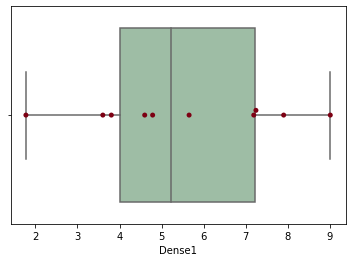

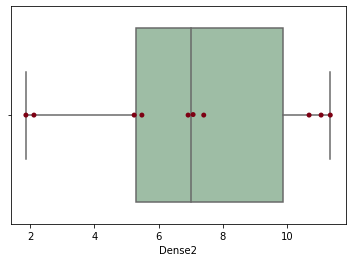

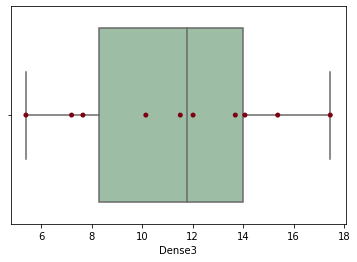

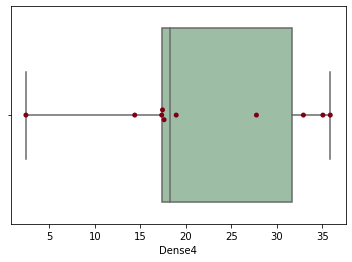

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Dense1', data=dataNew, color='#99c2a2')
ax = sns.swarmplot(x='Dense1', data=dataNew, color='#7d0013')
plt.show()
ax = sns.boxplot(x='Dense2', data=dataNew, color='#99c2a2')
ax = sns.swarmplot(x='Dense2', data=dataNew, color='#7d0013')
plt.show()
ax = sns.boxplot(x='Dense3', data=dataNew, color='#99c2a2')
ax = sns.swarmplot(x='Dense3', data=dataNew, color='#7d0013')
plt.show()
ax = sns.boxplot(x='Dense4', data=dataNew, color='#99c2a2')
ax = sns.swarmplot(x='Dense4', data=dataNew, color='#7d0013')
plt.show()

In [17]:
F, p = stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=15.188, p=0.000


In [19]:
alpha=0.05
# pvalue < alpha
# hypothesis is  H0 : m1=m2=m3=m4 vs H1 : at least mi not= mj , i,j=1,2,3,4
# reject H0
#conclusion : 
print(" here p value is " ,p," < lapha (0.05) ::: reject H0: m1=m2=m3=m4" )
print( " From p value we conclude that at means of atleast two dense is not same.")

 here p value is  1.5056597710857023e-06  < lapha (0.05) ::: reject H0: m1=m2=m3=m4
 From p value we conclude that at means of atleast two dense is not same.


# Two way Anova

In [7]:
d=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")

In [8]:
d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [9]:
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


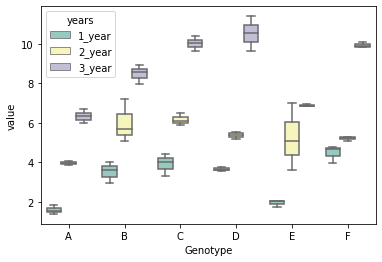

In [10]:
   
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [13]:
"""Output
                     	sum_sq  	df      	F       	PR(>F)
C(Genotype)         	58.551733 	5.0 	32.748581 	1.931655e-12
C(years)            	278.925633 	2.0 	390.014868 	4.006243e-25
C(Genotype):C(years) 	17.122967 	10.0 	4.788525 	2.230094e-04
Residual            	12.873000 	36.0 	NaN     	NaN
"""

'Output\n                     \tsum_sq  \tdf      \tF       \tPR(>F)\nC(Genotype)         \t58.551733 \t5.0 \t32.748581 \t1.931655e-12\nC(years)            \t278.925633 \t2.0 \t390.014868 \t4.006243e-25\nC(Genotype):C(years) \t17.122967 \t10.0 \t4.788525 \t2.230094e-04\nResidual            \t12.873000 \t36.0 \tNaN     \tNaN\n'

In [14]:
'''

The p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05).
We conclude that type of genotype significantly affects the yield outcome, 
time (years) significantly affects the yield outcome, and interaction of both
genotype and time (years) significantly affects the yield outcome.

'''

'\n\nThe p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05).\nWe conclude that type of genotype significantly affects the yield outcome, \ntime (years) significantly affects the yield outcome, and interaction of both\ngenotype and time (years) significantly affects the yield outcome.\n\n'

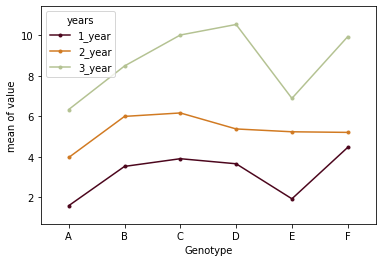

In [15]:
# As the interaction is significant, interaction plot for interaction effects :
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()


In [16]:
# the interaction effect is significant between the Genotype and years because three lines are not parallel 
#(roughly parallel factor lines indicate no interaction - additive model).
#This interaction is also called ordinal interaction as the lines do not cross each other.